# RTT planning algorithm

In [1]:
import matplotlib.pyplot as plt
import random
import math
import copy

show_animation = True

class RRT():
    def __init__(self, start, goal, obstacleList,
                 randArea, expandDis=1.0, goalSampleRate=5, maxIter=500):
        """
        start:Start Position [x,y]
        goal:Goal Position [x,y]
        obstacleList:obstacle Positions [[x,y,size],...]
        randArea:Ramdom Samping Area [min,max]
        """
        self.start = Node(start[0], start[1])
        self.end = Node(goal[0], goal[1])
        self.minrand = randArea[0]
        self.maxrand = randArea[1]
        self.expandDis = expandDis
        self.goalSampleRate = goalSampleRate
        self.maxIter = maxIter
        self.obstacleList = obstacleList

    def planning(self, animation=True):
        self.nodeList = [self.start]
        while True:
            # Random Sampling
            if random.randint(0, 100) > self.goalSampleRate:
                rnd = [random.uniform(self.minrand, self.maxrand), random.uniform(
                    self.minrand, self.maxrand)]
            else:
                rnd = [self.end.x, self.end.y]

            # Find nearest node
            nind = self.getNearestListIndex(self.nodeList, rnd)

            # expand tree
            nearestNode = self.nodeList[nind]
            theta = math.atan2(rnd[1] - nearestNode.y, rnd[0] - nearestNode.x)

            newNode = copy.deepcopy(nearestNode)
            newNode.x += self.expandDis * math.cos(theta)
            newNode.y += self.expandDis * math.sin(theta)
            newNode.parent = nind

            if not self.__collisionCheck(newNode, self.obstacleList):
                continue

            self.nodeList.append(newNode)

            # check goal
            dx = newNode.x - self.end.x
            dy = newNode.y - self.end.y
            d = math.sqrt(dx * dx + dy * dy)
            if d <= self.expandDis:
                print("Goal!!")
                break

            if animation:
                self.drawGraph(rnd)

        path = [[self.end.x, self.end.y]]
        lastIndex = len(self.nodeList) - 1
        while self.nodeList[lastIndex].parent is not None:
            node = self.nodeList[lastIndex]
            path.append([node.x, node.y])
            lastIndex = node.parent
        path.append([self.start.x, self.start.y])

        return path

    def drawFinalGraph(self, path):
        self.drawGraph()
        plt.plot([x for (x, y) in path], [y for (x, y) in path], '-r')
        plt.grid(True)
        plt.show()

    def drawGraph(self, rnd=None):
        plt.clf()
        if rnd is not None:
            plt.plot(rnd[0], rnd[1], "^k")
        for node in self.nodeList:
            if node.parent is not None:
                plt.plot([node.x, self.nodeList[node.parent].x], [
                         node.y, self.nodeList[node.parent].y], "-g")

        for (ox, oy, size) in self.obstacleList:
            plt.plot(ox, oy, "ok", ms=30 * size)

        plt.plot(self.start.x, self.start.y, "xr")
        plt.plot(self.end.x, self.end.y, "xr")
        plt.axis([-2, 15, -2, 15])
        plt.grid(True)
        plt.pause(0.01)

    def getNearestListIndex(self, nodeList, rnd):
        dlist = [(node.x - rnd[0]) ** 2 + (node.y - rnd[1])
                 ** 2 for node in nodeList]
        minind = dlist.index(min(dlist))
        return minind

    def __collisionCheck(self, node, obstacleList):

        for (ox, oy, size) in obstacleList:
            dx = ox - node.x
            dy = oy - node.y
            d = math.sqrt(dx * dx + dy * dy)
            if d <= size:
                return False  # collision

        return True  # safe

class Node():
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.parent = None

start RRT path planning


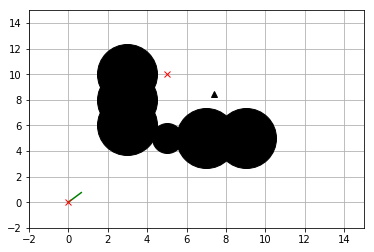

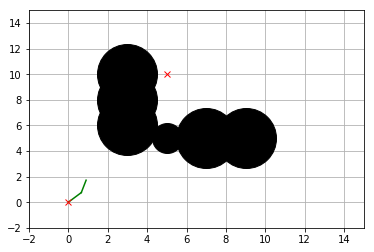

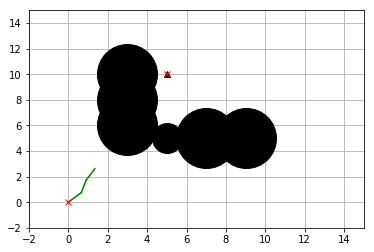

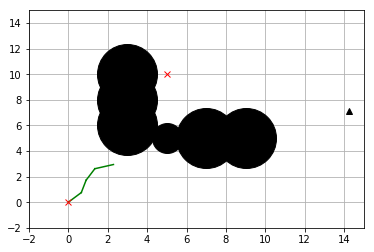

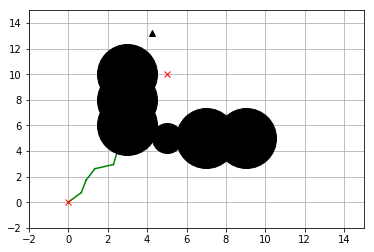

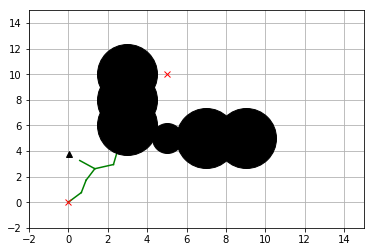

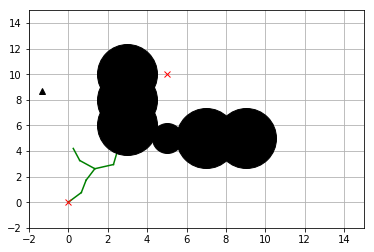

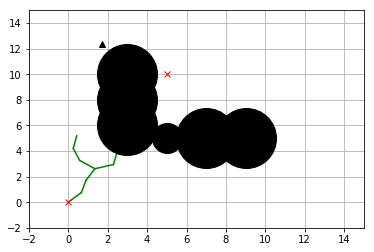

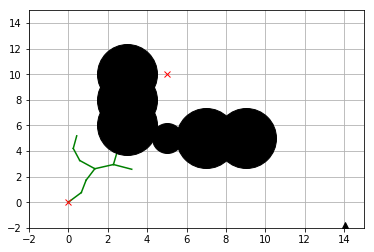

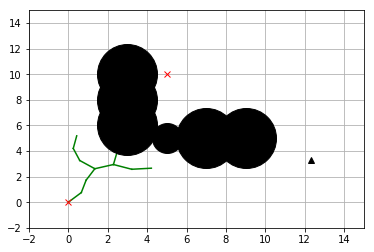

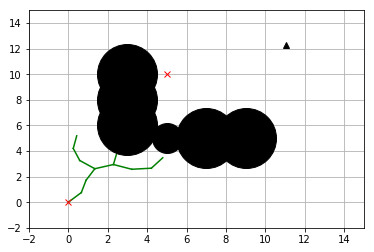

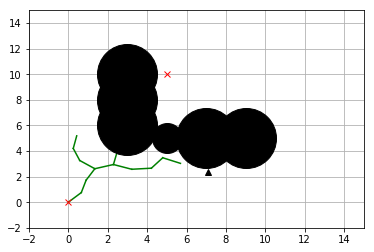

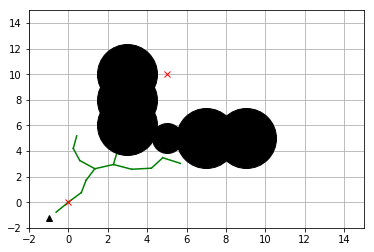

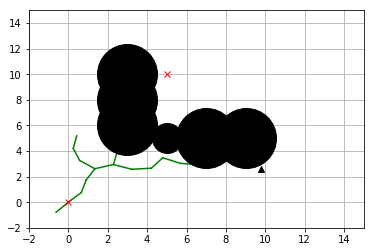

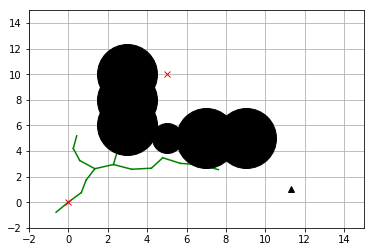

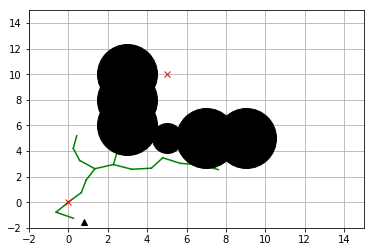

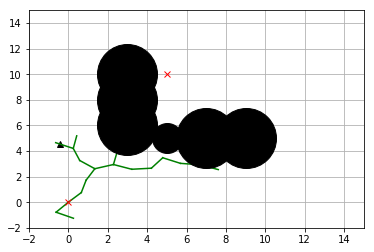

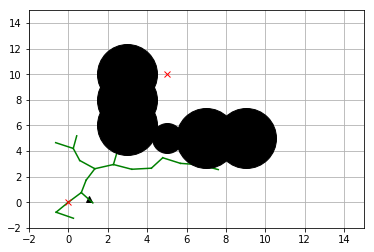

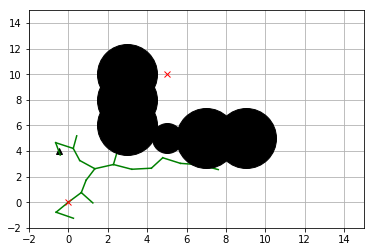

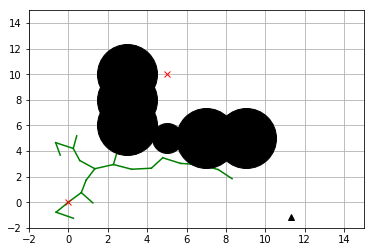

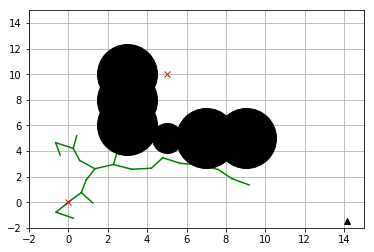

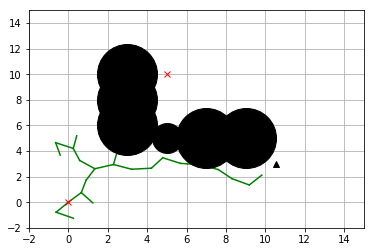

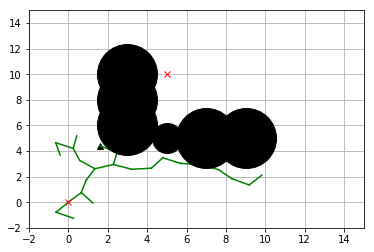

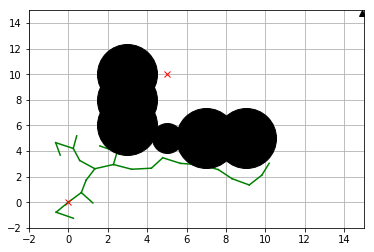

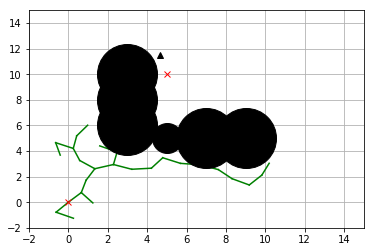

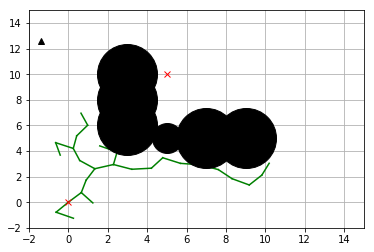

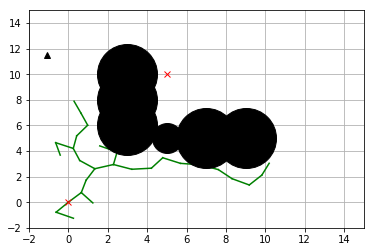

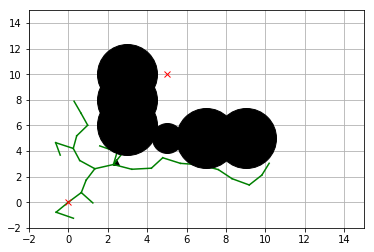

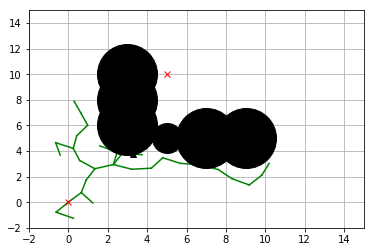

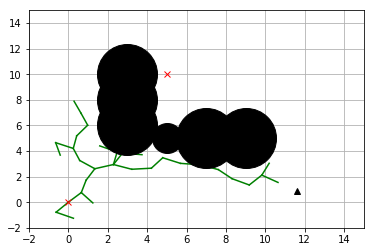

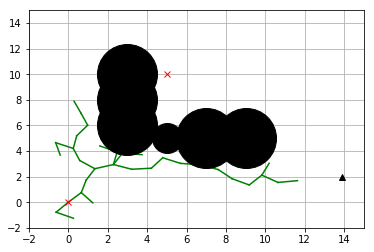

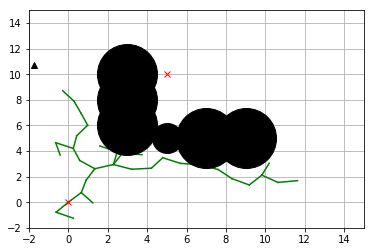

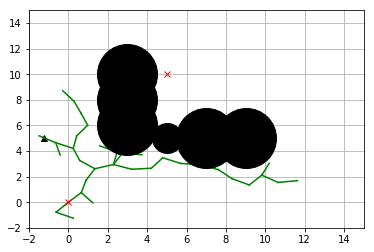

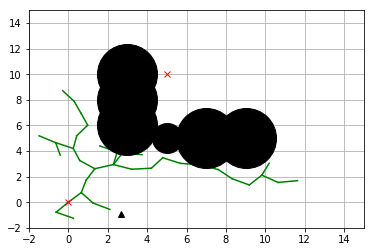

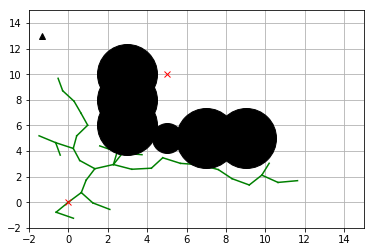

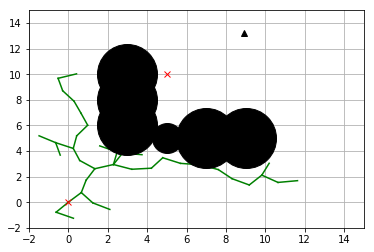

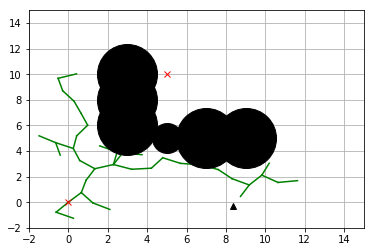

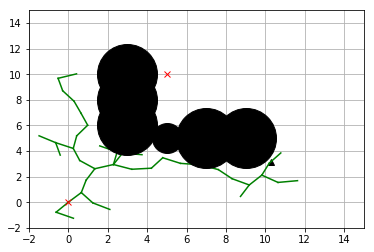

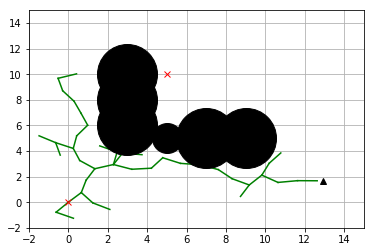

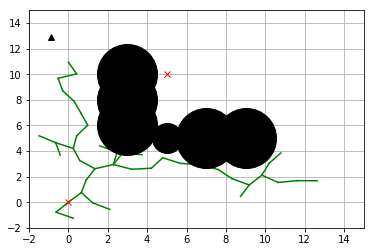

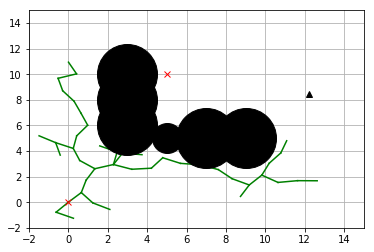

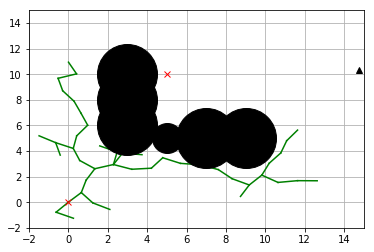

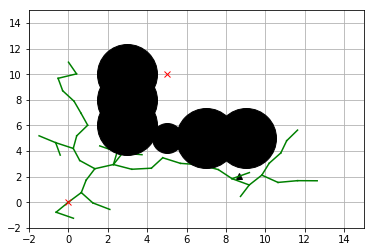

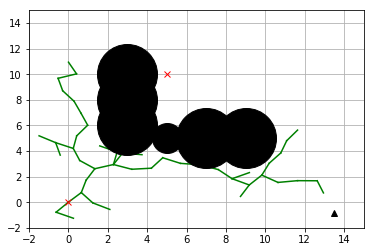

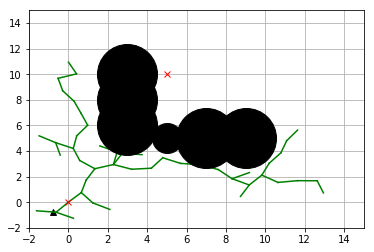

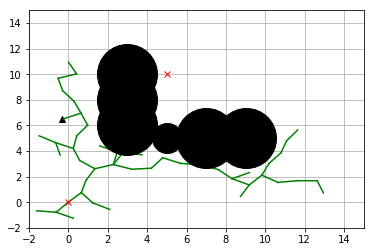

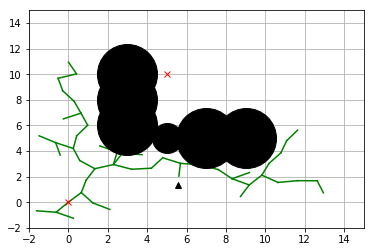

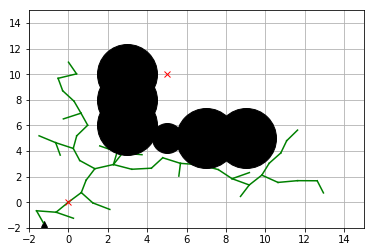

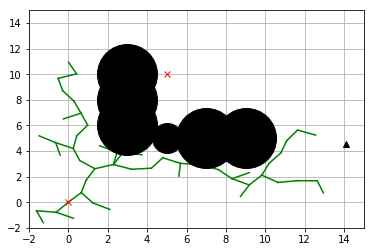

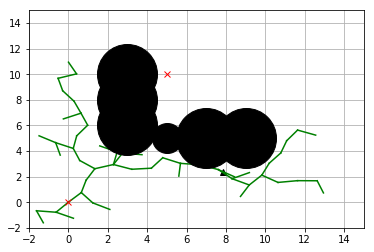

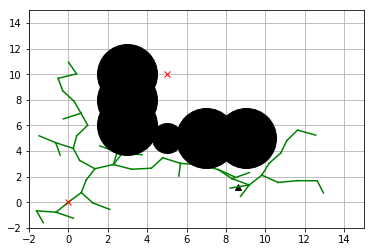

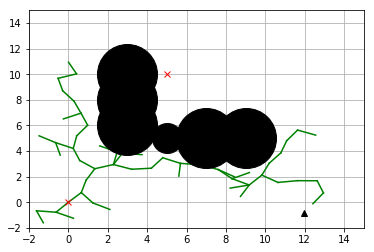

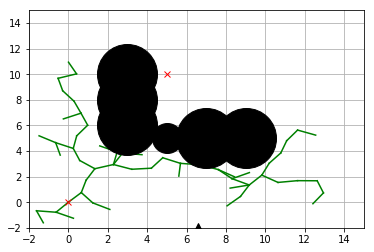

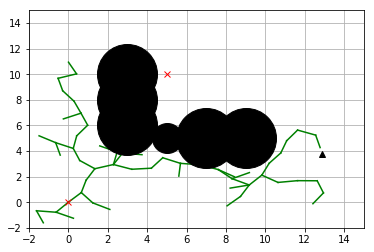

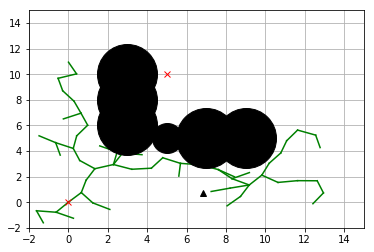

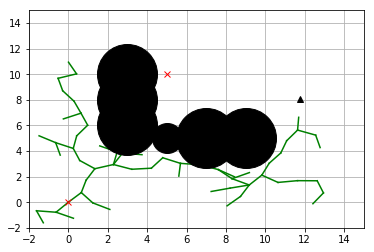

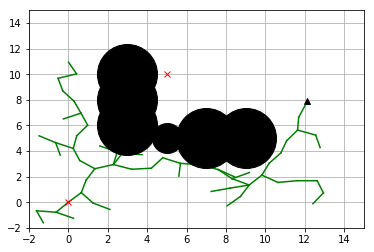

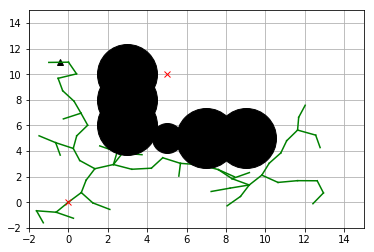

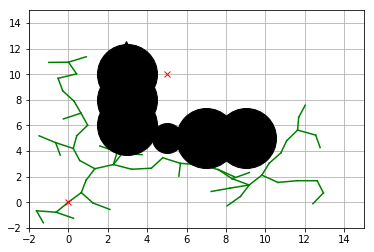

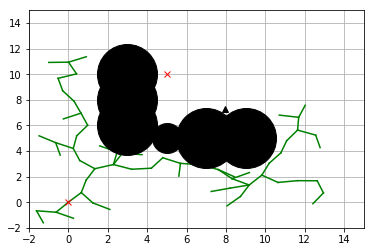

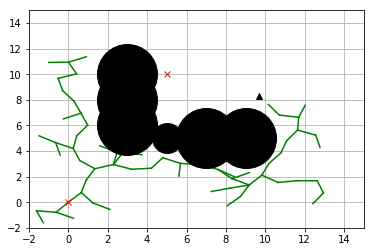

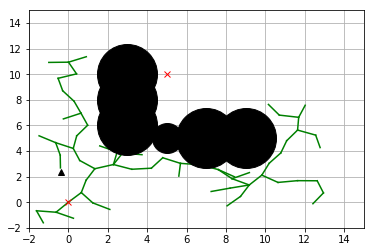

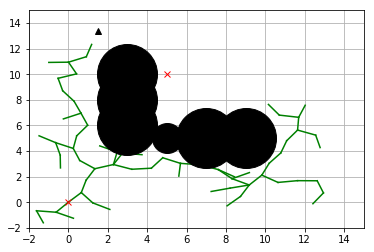

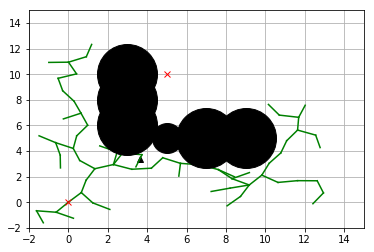

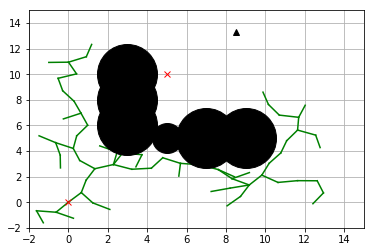

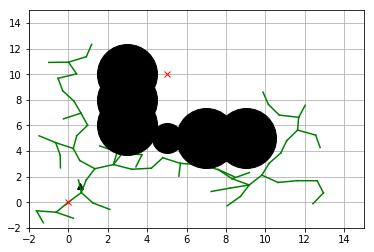

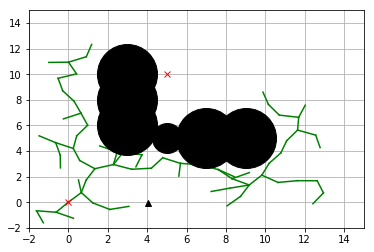

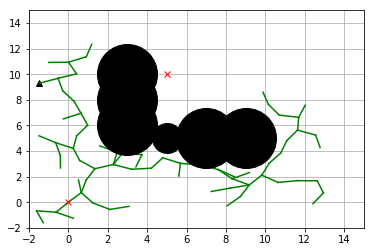

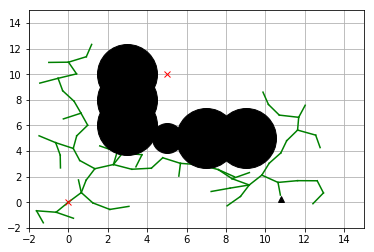

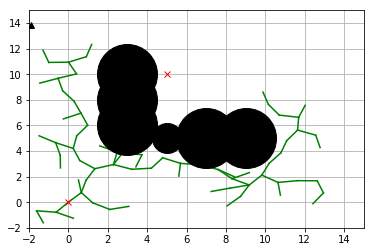

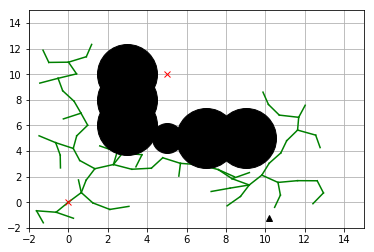

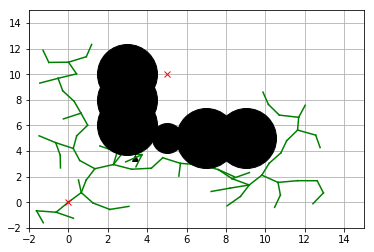

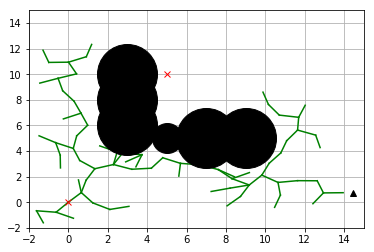

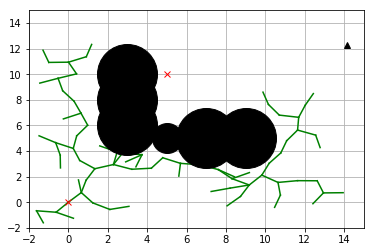

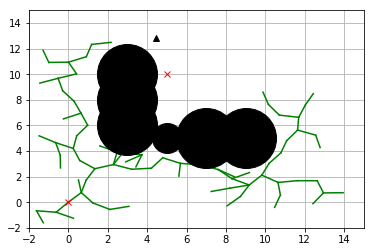

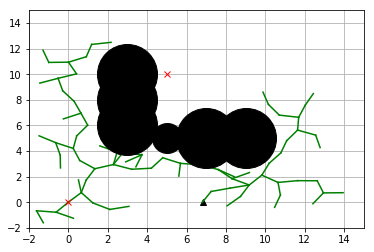

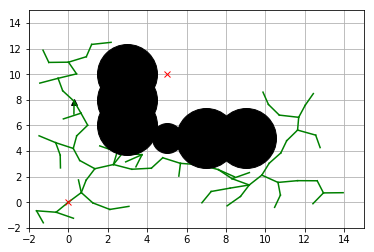

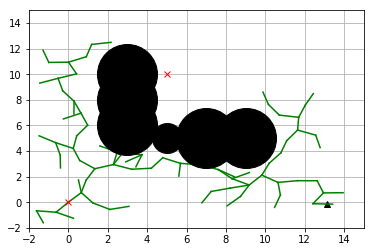

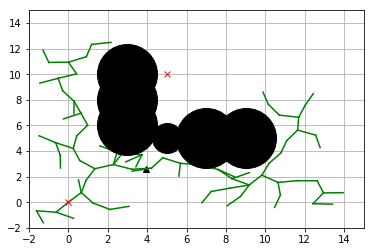

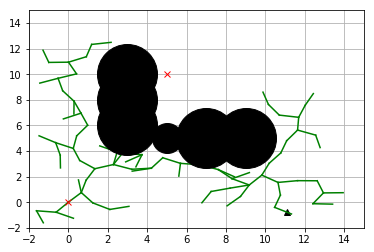

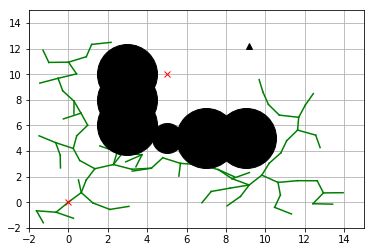

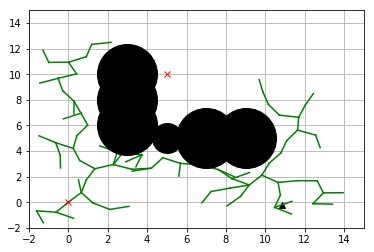

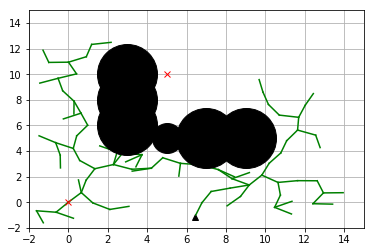

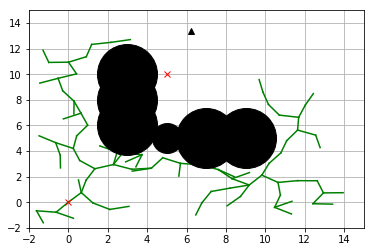

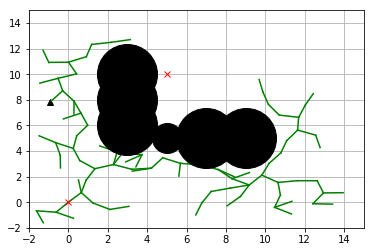

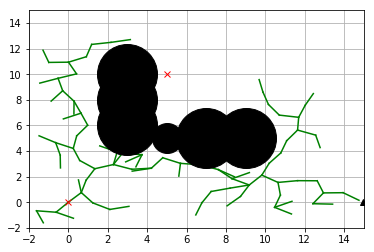

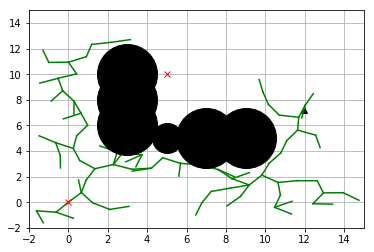

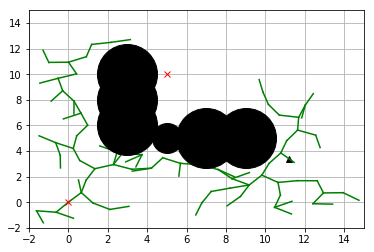

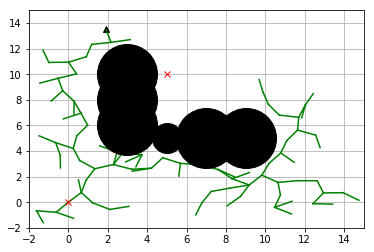

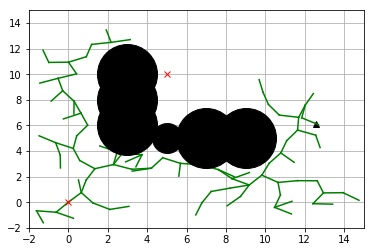

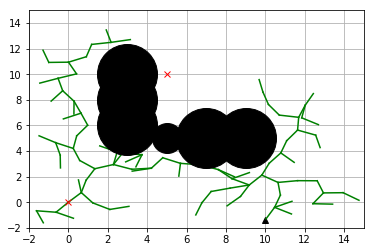

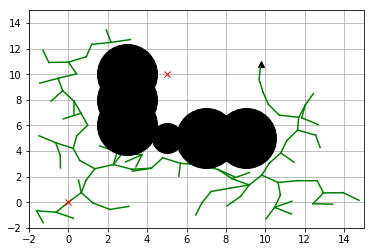

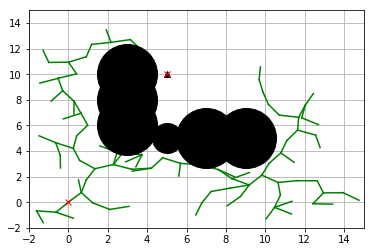

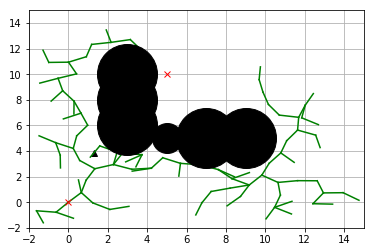

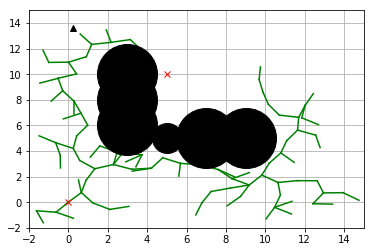

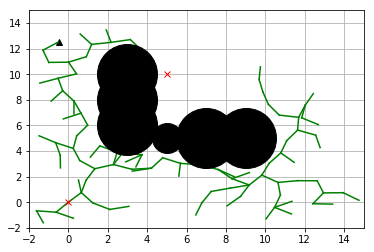

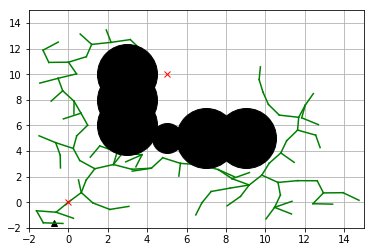

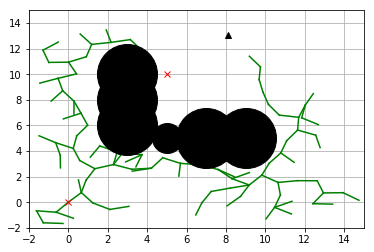

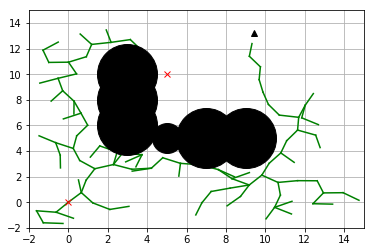

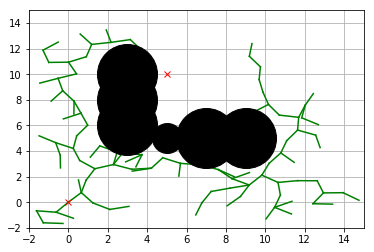

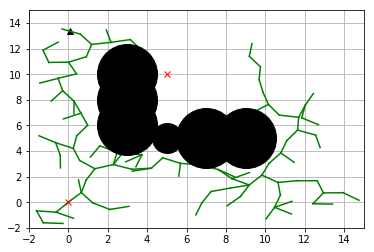

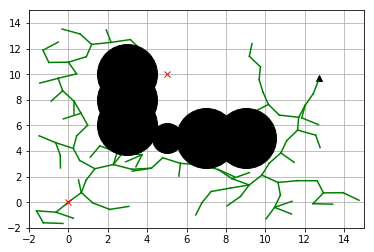

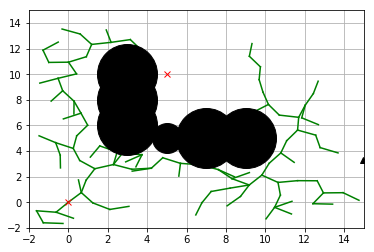

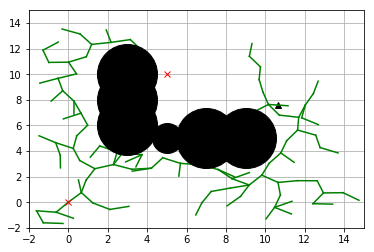

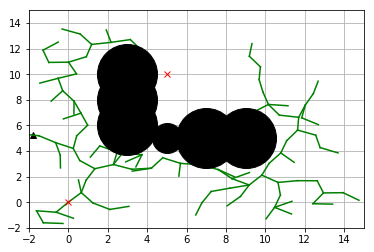

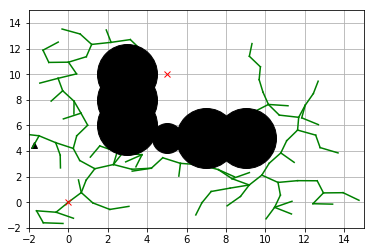

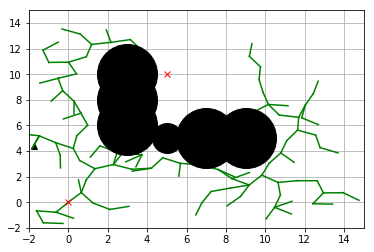

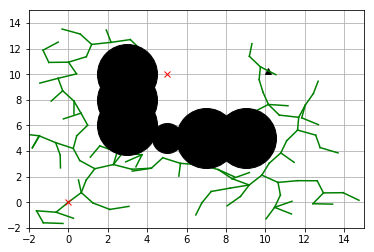

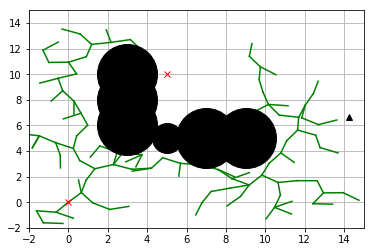

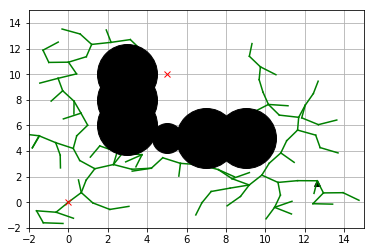

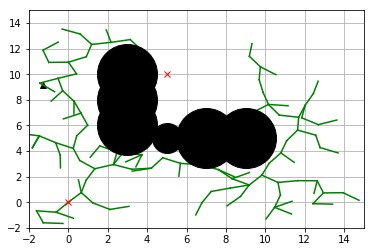

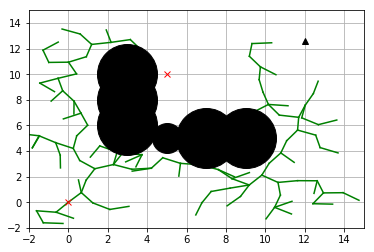

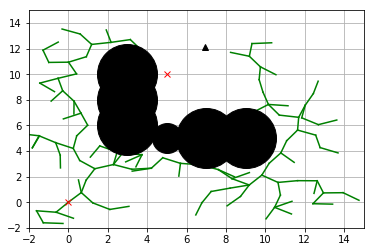

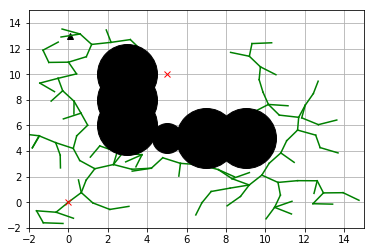

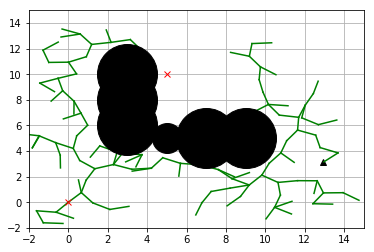

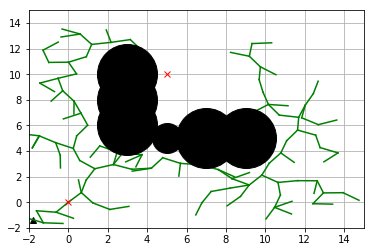

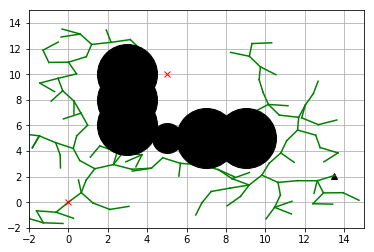

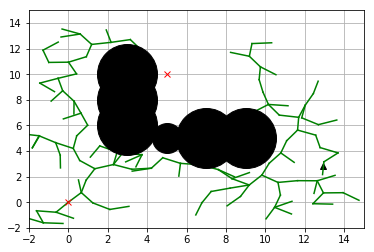

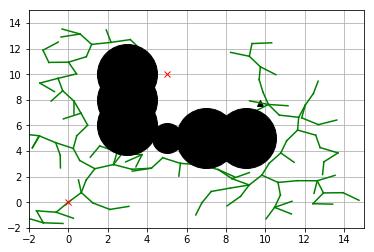

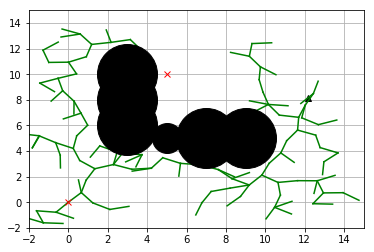

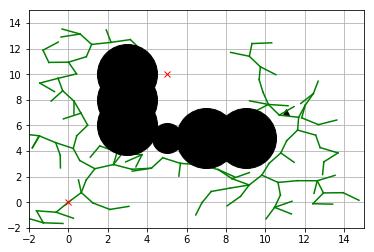

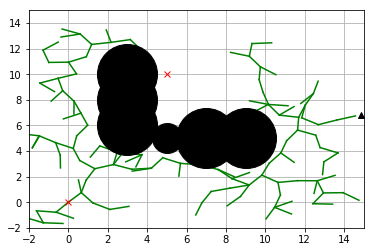

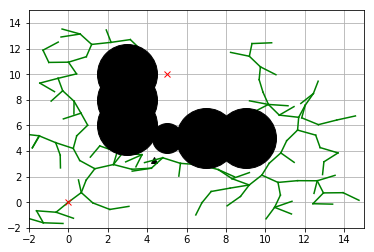

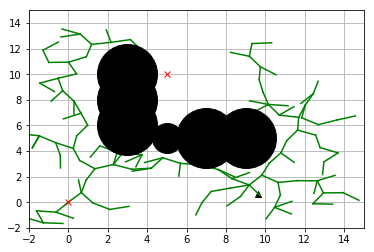

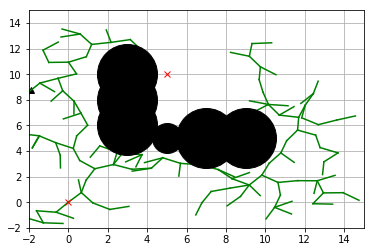

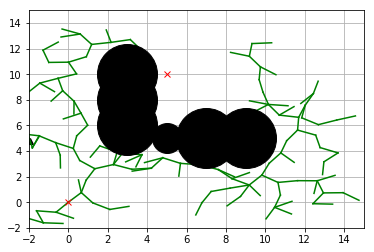

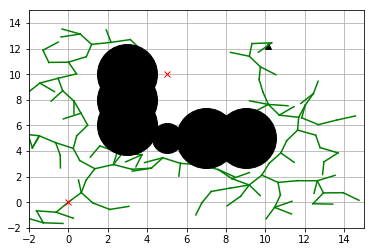

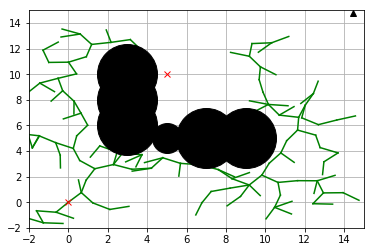

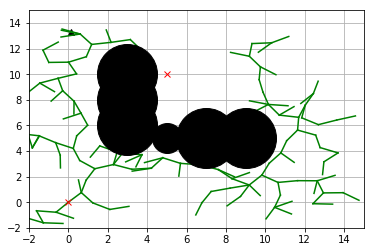

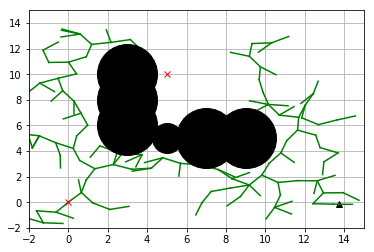

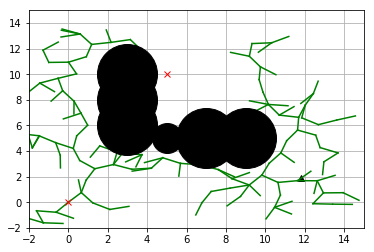

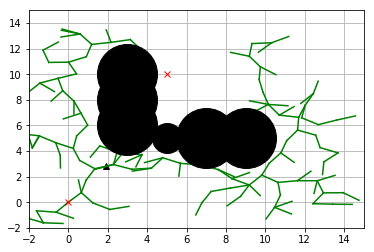

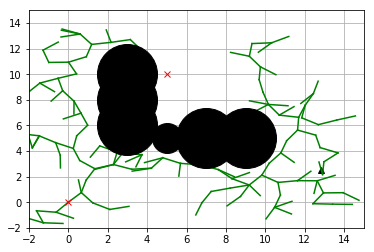

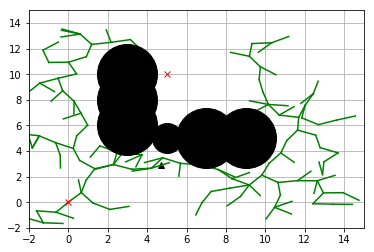

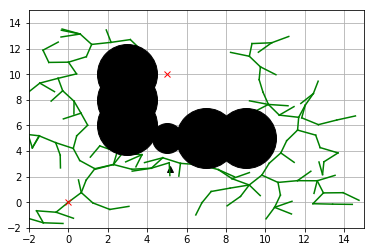

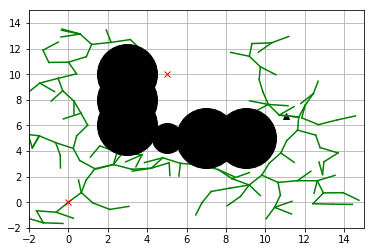

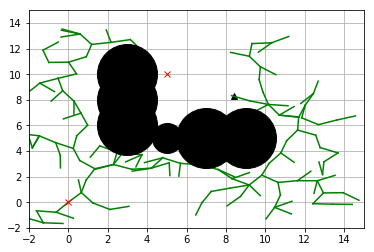

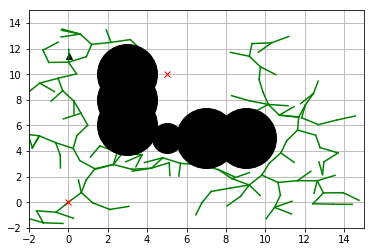

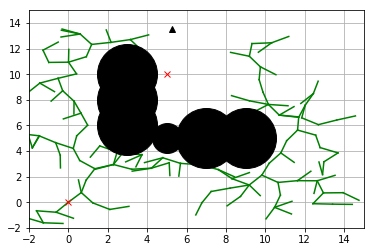

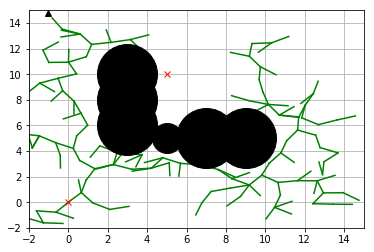

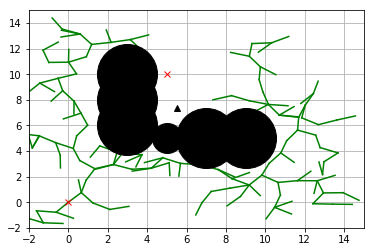

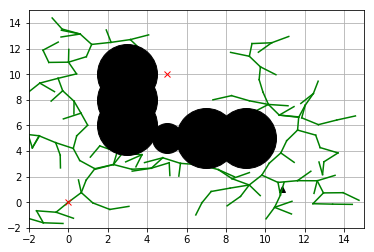

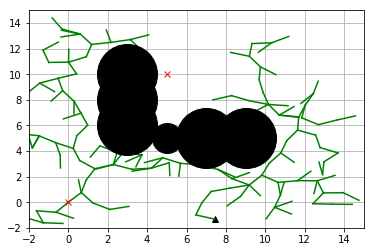

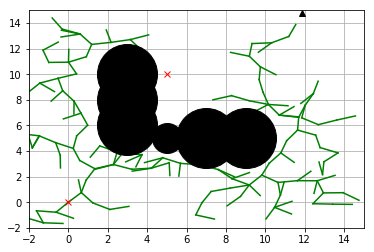

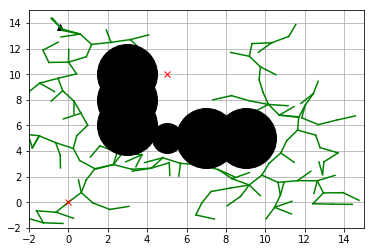

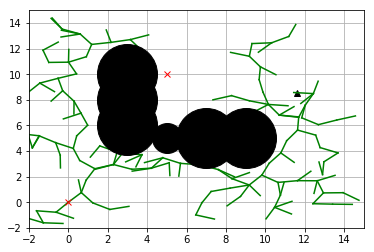

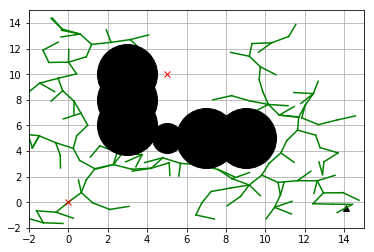

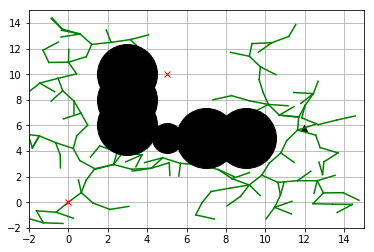

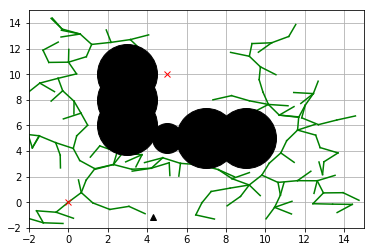

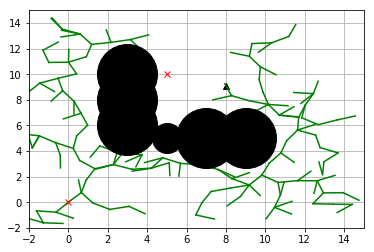

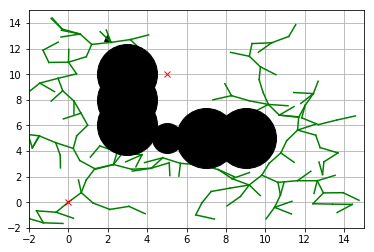

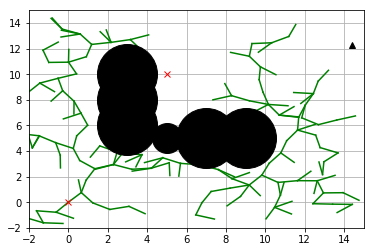

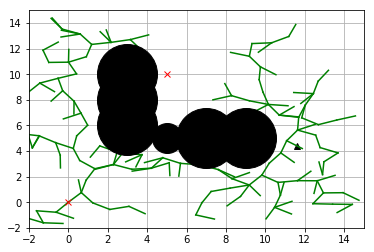

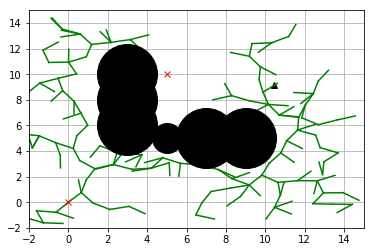

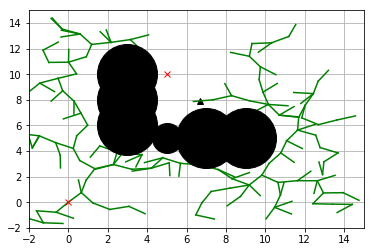

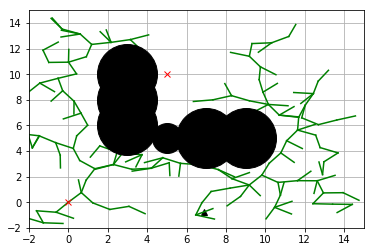

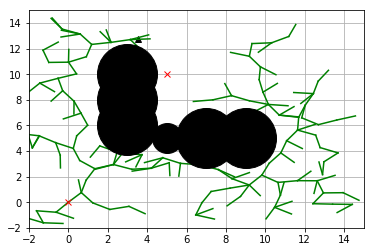

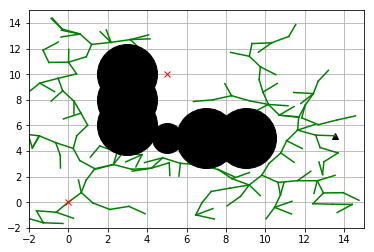

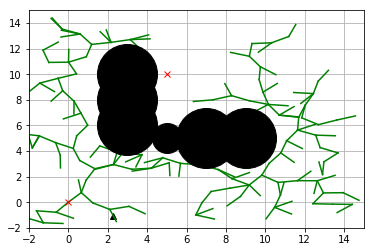

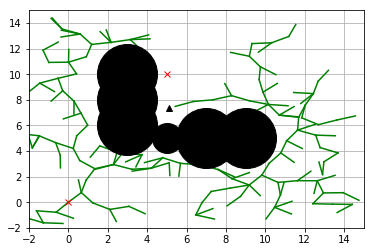

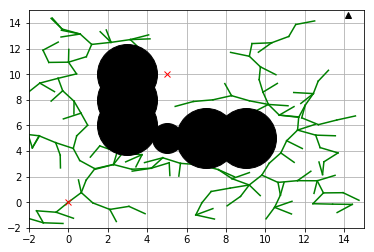

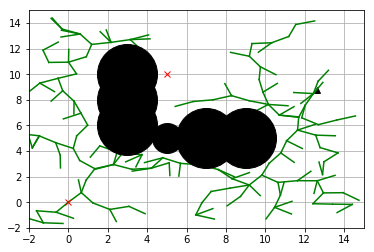

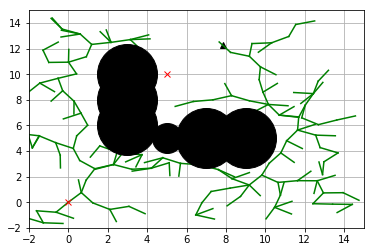

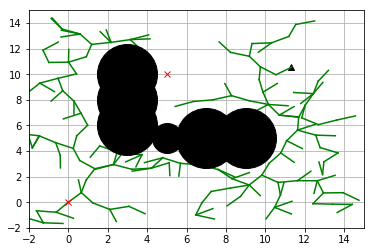

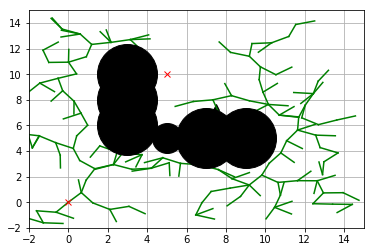

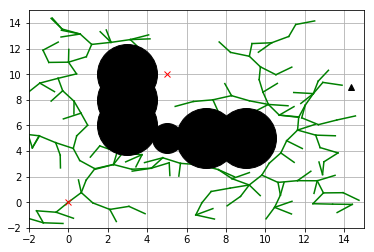

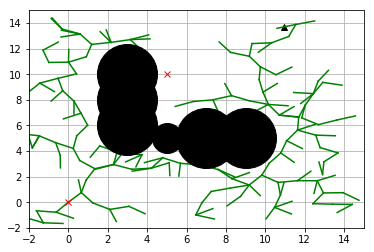

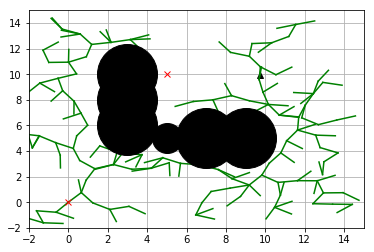

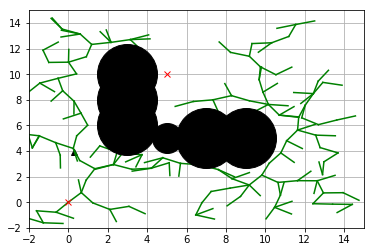

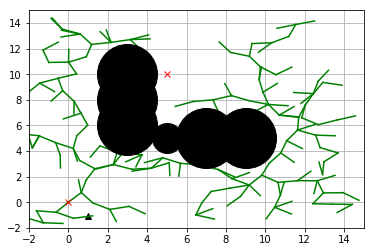

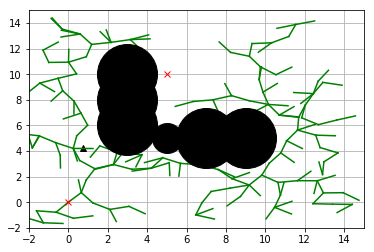

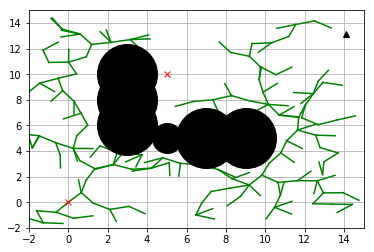

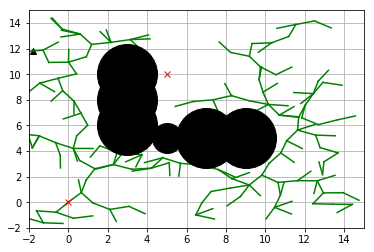

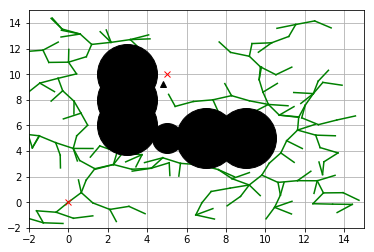

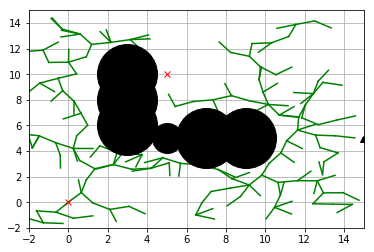

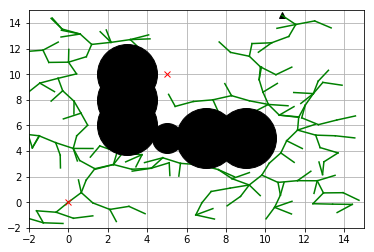

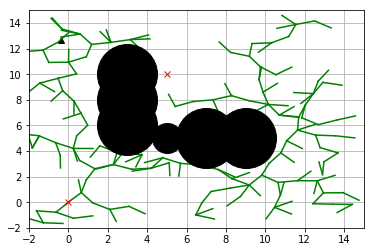

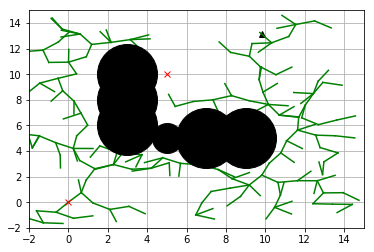

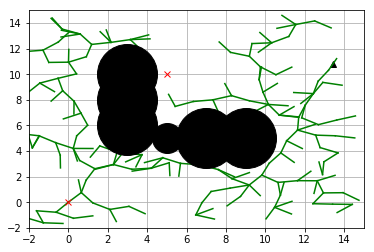

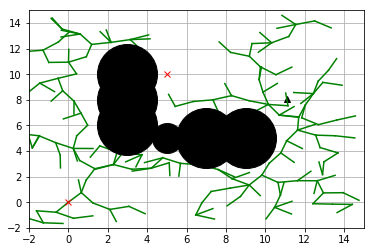

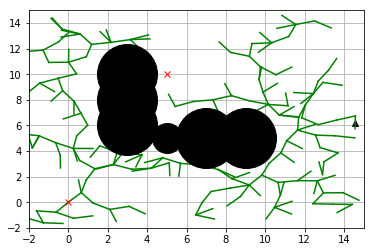

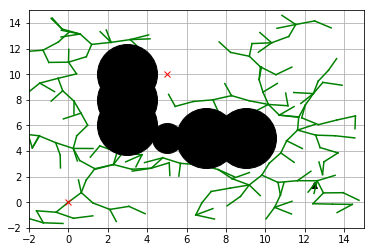

Goal!!


NameError: name 'rtt' is not defined

In [2]:
obstacleList = [
    (5, 5, 1),
    (3, 6, 2),
    (3, 8, 2),
    (3, 10, 2),
    (7, 5, 2),
    (9, 5, 2)]
start=[0, 0]
goal=[5, 10]
randArea=[-2, 15]
    
print("start RRT path planning")
rrt = RRT(start=start, goal=goal, randArea=randArea, obstacleList=obstacleList)
path = rrt.planning(animation=show_animation)
# Draw final path
if show_animation:
    rrt.drawFinalGraph(path)